# <center> 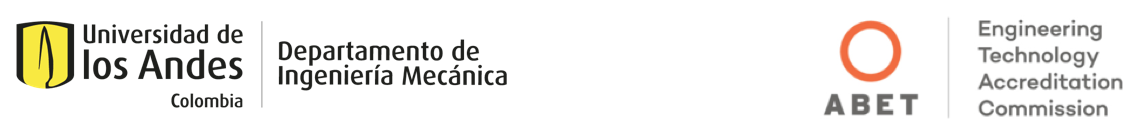
## <span style="color: #147CA6"><center> IMEC 2001-Herramientas Computacionales
## <span style="color: #1AA3D9"><center> Taller 2-Visualización Básica

### <span style="color: #147CA6">Fecha Límite de Entrega (Bloque Neón): <font color="#1AA3D9">TODO</font>
___
### <span style="color: #147CA6"> Descripción de la actividad

La  actividad  tiene  como  objetivodemostrar  su  manejo  de  datos  estructurados  en dataframes y la visualización de series de datos.

### <span style="color: #147CA6"> Tener en Cuenta

1. Enviar vía Bloque Neón el archivo en Jupyter Notebook (extensión <font color="#1AA3D9">'.ipynb'</font>).

**Nota:** <font color="#1AA3D9">El nombre del archivo debe ser: `Taller2_NombreApellido1_NombreApellido2.ipynb`.</font>

---

### <span style="color: #1AA3D9"><center> Item 1: Estadísticas y gráficas de datos

Dentro de la carpeta data, el archivo <font color="#1AA3D9">solar_production.csv</font> contiene  datos  de producción  de  la  planta  solar  fotovoltaica  ubicada  en  el  edificio  Santo  Domingo  de  la Universidad de los Andes.

1. Obtener una descripción estadística de las columnas de datos. Para esto, explore la función describe().
2. Produzca dos gráficas de interés y comente sobre los resultados observados

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


        Zenith (deg)  Elevation (deg)  Azimuth (deg)  Airmass Relative (ad)  \
count  105406.000000    105406.000000  105406.000000           53005.000000   
mean       89.958175         0.041825     180.010195               3.235606   
std        47.384955        47.384955      96.915780               4.951124   
min         0.100000       -89.910000       0.000000               1.000000   
25%        47.542500       -42.380000      89.000000               1.140000   
50%        90.010000        -0.010000     179.995000               1.490000   
75%       132.380000        42.457500     271.020000               2.760000   
max       179.910000        89.900000     359.940000              37.920000   

       Airmass Absolute (ad)  Extraterrestrial Radiation (W/m2)  \
count           53005.000000                      105406.000000   
mean                2.345593                        1361.284829   
std                 3.589171                          32.248608   
min                 

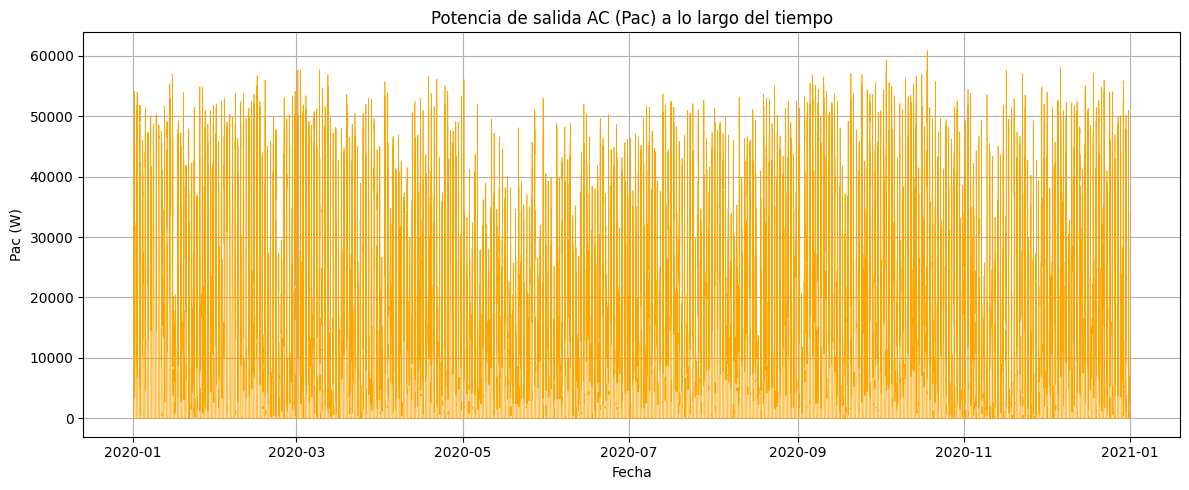

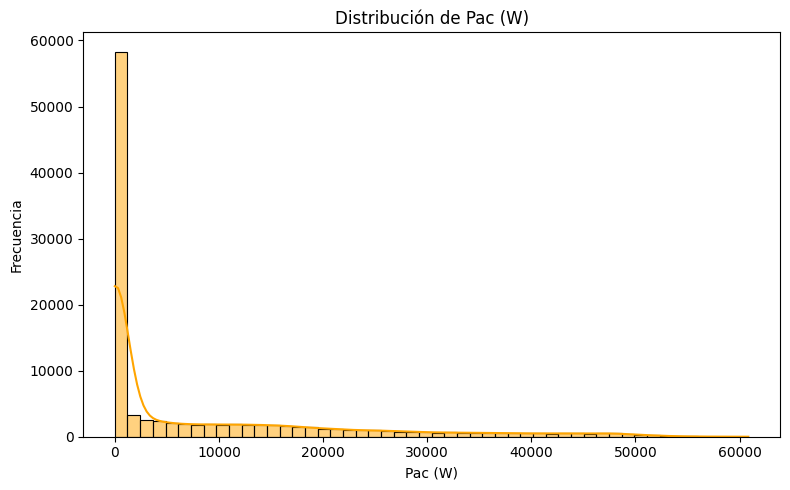

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("data/solar_production.csv", sep=";")


df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')


print(df.describe())


plt.figure(figsize=(12, 5))
plt.plot(df['Datetime'], df['Pac (W)'], color='orange', linewidth=0.5)
plt.title("Potencia de salida AC (Pac) a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Pac (W)")
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.histplot(df['Pac (W)'], bins=50, kde=True, color='orange')
plt.title("Distribución de Pac (W)")
plt.xlabel("Pac (W)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


___
### <span style="color: #1AA3D9"><center> Item 2: Estadísticas y gráficas de datos

En la carpeta data se dispone el archivo <font color="#1AA3D9">SD_5Min.xlsx</font> que contiene las medicionesde  los  valores  de  producción  de  la  planta  solar  fotovoltaica  ubicada  en  el edificio Santo Domingo de la Universidad de los Andes, desde 1-Agosto-2019 hasta 30-Junio-2021.

1. Calcule los valores máximo, promedio y mínimo para los días de un mes de interés durante cada instante de tiempo.
2. Produzca una gráfica que presente estos datos, por ejemplo (series mean,max,min):

# <center> 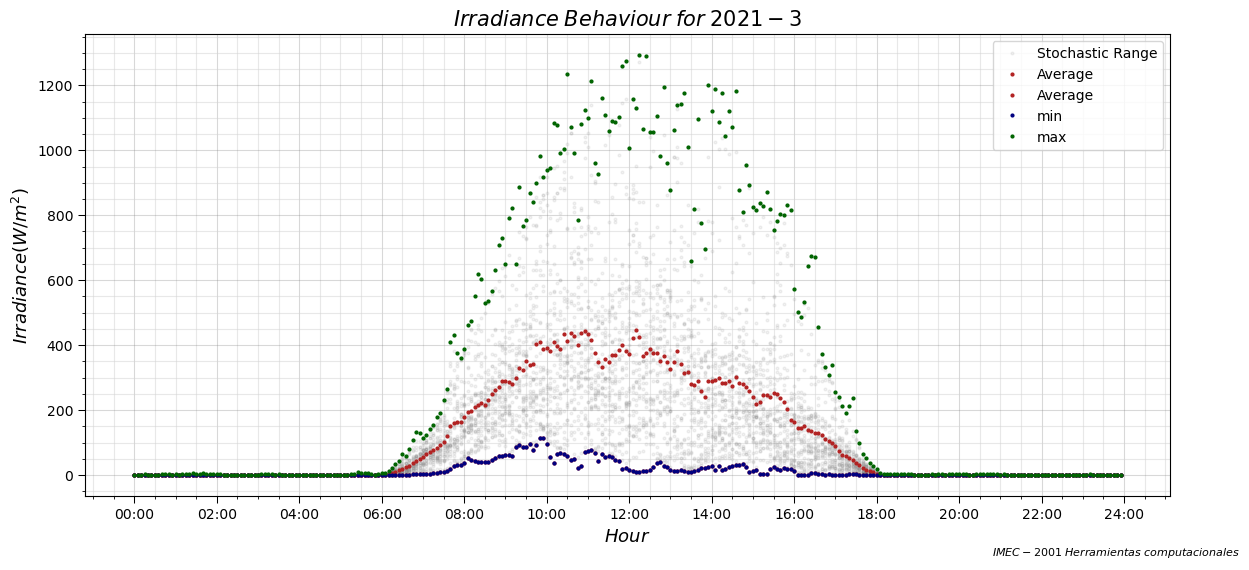

c:\Users\Phobos_Mt\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


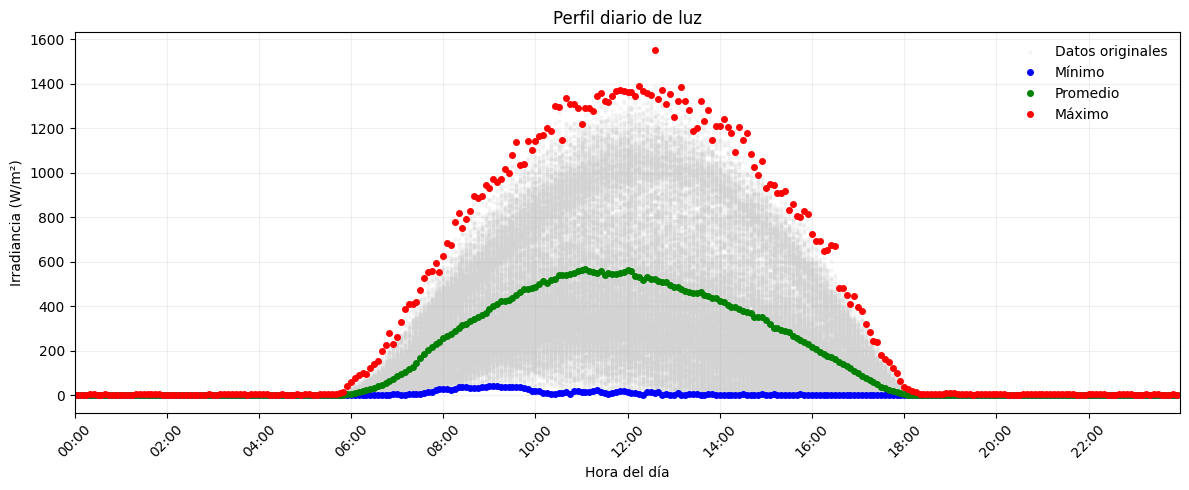

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#Poner la ruta del archivo porfa 
ruta_archivo = r"C:\Users\Phobos_Mt\Desktop\Herramientas Computacionales\Taller_2_Herramientas_Computacionales\data\SD_5Min.xlsx"

if os.path.exists(ruta_archivo):
    datos = pd.read_excel(ruta_archivo, usecols=[0, 1, 2], names=["fecha", "luz_lufft", "luz_meteocontrol"])
    datos["fecha"] = pd.to_datetime(datos["fecha"], errors="coerce")
    datos = datos.dropna(subset=["fecha"])

    datos = datos[datos["luz_lufft"] > 0]
    
    datos["hora"] = pd.to_datetime(datos["fecha"].dt.strftime("%H:%M"), format="%H:%M")
    
    resumen_horas = datos.groupby("hora")["luz_lufft"].agg(
        minimo="min",
        maximo="max",
        promedio="mean"
    ).reset_index()

    plt.figure(figsize=(12, 5))
    plt.scatter(datos["hora"], datos["luz_lufft"], color="lightgray", s=4, alpha=0.15, label="Datos originales")

    plt.plot(resumen_horas["hora"], resumen_horas["minimo"], marker="o", linestyle="None", color="blue", markersize=4, label="Mínimo")
    plt.plot(resumen_horas["hora"], resumen_horas["promedio"], marker="o", linestyle="None", color="green", markersize=4, label="Promedio")
    plt.plot(resumen_horas["hora"], resumen_horas["maximo"], marker="o", linestyle="None", color="red", markersize=4, label="Máximo")
    
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    plt.xlim(pd.to_datetime("00:00", format="%H:%M"), pd.to_datetime("23:59", format="%H:%M"))
    plt.xticks(rotation=45)

    plt.title("Perfil diario de luz")
    plt.xlabel("Hora del día")
    plt.ylabel("Irradiancia (W/m²)")
    plt.grid(alpha=0.2)
    plt.legend(frameon=False)

    plt.tight_layout()
    plt.show()



___
### <span style="color: #1AA3D9"><center> Bono (+1.0)

Usando la librería <font color="#1AA3D9">ipywidgets</font> y sus comandos <font color="#1AA3D9">interact</font> y <font color="#1AA3D9">datePicker</font> cree la misma gráfica del punto anterior pero en un rango de fechas seleccionado a partir del <font color="#1AA3D9">datePicker</font>

# <center> 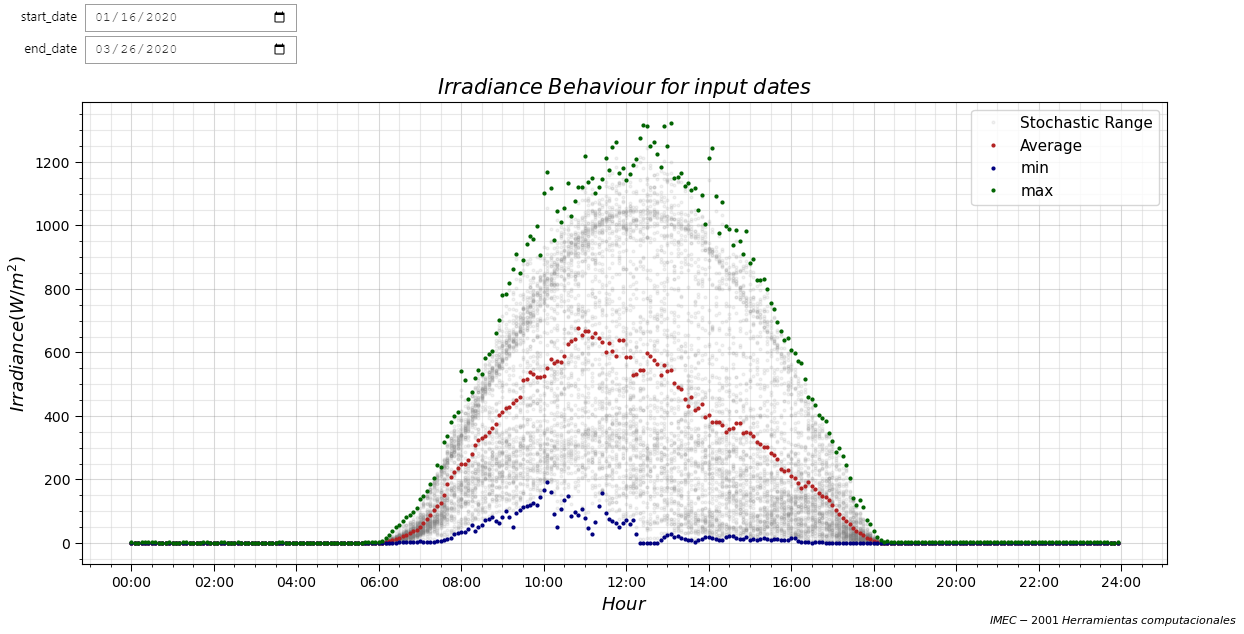

In [3]:
pip install ipywidgets


Note: you may need to restart the kernel to use updated packages.


In [ ]:

from ipywidgets import interact, DatePicker
import matplotlib.dates as mdates


df = pd.read_excel("data/SD_5Min.xlsx")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

def plot_irradiance_range(start_date, end_date):
    if start_date is None or end_date is None:
        return
    
    mask = (df['Date'].dt.date >= start_date) & (df['Date'].dt.date <= end_date)
    datos_rango = df.loc[mask].copy()
    
    if datos_rango.empty:
        print("No hay datos para el rango seleccionado.")
        return
    
  
    datos_rango['Hora'] = datos_rango['Date'].dt.time
    datos_rango['Hora_dt'] = pd.to_datetime(datos_rango['Hora'].astype(str))
    

    stats = datos_rango.groupby('Hora_dt')['Lufft Irrad (W/m2)'].agg(['mean', 'min', 'max']).reset_index()
    

    fig, ax = plt.subplots(figsize=(12,6))
    

    ax.scatter(datos_rango['Hora_dt'], datos_rango['Lufft Irrad (W/m2)'],
               color='gray', alpha=0.3, label='Stochastic Range', s=10)
    

    ax.scatter(stats['Hora_dt'], stats['mean'], color='red', label='Average', s=15)
    ax.scatter(stats['Hora_dt'], stats['min'], color='blue', label='min', s=15)
    ax.scatter(stats['Hora_dt'], stats['max'], color='green', label='max', s=15)
    

    ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    

    ax.set_title("Irradiance Behaviour for input dates", fontsize=14, style='italic')
    ax.set_xlabel("")
    ax.set_ylabel(r"$Irradiance (W/m^2)$", fontsize=12, style='italic')
    ax.grid(True, which='both', linestyle='--', alpha=0.5)
    ax.legend()
    plt.xticks(rotation=0)
    plt.show()


start_picker = DatePicker(description='start_date')
end_picker = DatePicker(description='end_date')

interact(plot_irradiance_range, start_date=start_picker, end_date=end_picker)


c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


interactive(children=(DatePicker(value=None, description='start_date', step=1), DatePicker(value=None, descrip…

<function __main__.plot_irradiance_range(start_date, end_date)>